In [17]:
import transformers
from tqdm import tqdm
import pandas as pd

In [18]:
tokenizer = transformers.AutoTokenizer.from_pretrained('klue/roberta-base', max_length=128)

/data/ephemeral/home/miniconda3/envs/heejun-base/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [19]:
def tokenizing(self, dataframe):
    data = []
    for idx, item in tqdm(dataframe.iterrows(), desc='tokenizing', total=len(dataframe)):
    # 두 입력 문장을 [SEP] 토큰으로 이어붙여서 전처리합니다.
        text = '[SEP]'.join([item[text_column] for text_column in ['sentence_1', 'sentence_2']])
        # padding=True와 truncation=True 옵션 추가
        outputs = tokenizer(
            text,
            add_special_tokens=True,
            padding='max_length',  # max_length로 패딩을 고정
            truncation=True,       # 텍스트를 최대 길이로 자름
            max_length=128         # max_length 설정
        )
        data.append(outputs['input_ids'])
    return data

In [20]:
cls_token_id = tokenizer.cls_token_id
print(f"CLS token ID: {cls_token_id}")

pad_token_id = tokenizer.pad_token_id
print(f"Padding token ID: {pad_token_id}")

sep_token_id = tokenizer.sep_token_id
print(f"Separation token ID: {sep_token_id}")

unk_token_id = tokenizer.unk_token_id
print(f"Unknown token ID: {unk_token_id}")

CLS token ID: 0
Padding token ID: 1
Separation token ID: 2
Unknown token ID: 3


In [21]:
train = pd.read_csv('../data/train.csv')

In [22]:
# pick 10 samples for testing
train = train.sample(10)

In [23]:
train_tokenized = tokenizing(tokenizer, train)

tokenizing: 100%|██████████| 10/10 [00:00<00:00, 2493.79it/s]


In [24]:
train_tokenized

[[0,
  1478,
  2465,
  2119,
  1891,
  1141,
  3685,
  2178,
  2067,
  2321,
  193,
  17,
  2,
  32,
  21639,
  2238,
  18946,
  34,
  805,
  2119,
  1891,
  1141,
  4146,
  2097,
  2178,
  2067,
  2321,
  5,
  5311,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [0,
  1437,
  2343,
  2138,
  4530,
  5333,
  6396,
  1160,
  2318,
  858,
  13964,
  16,
  4665,
  2119,
  23009,
  2052,
  8260,
  2112,
  1043,
  2170,
  1378,
  2031,
  2359,
  3683,
  4785,
  4483,
  2075,
  637,
  2125,
  4787,
  2259,
  1521,
  7263,
  2112,
  7478,
  2359,
  21

In [25]:
train

,id,source,sentence_1,sentence_2,label,binary-label
6119,boostcamp-sts-v1-train-6119,slack-sampled,원곡도 한 번 들어보시죠 ㅎ -,<PERSON> 님도 한 번 고려해보시죠! ㅎㅎ,0.0,0.0
6050,boostcamp-sts-v1-train-6050,nsmc-rtt,"영드를 보고 궁금해서 보게 됐는데, 드라마도 각색이 심해서 맘에 안들었지만 그래도 ...",궁금해서 영화를 봤는데 적응이 너무 안되어서 드라마를 좋아하지 않았지만 연기와 드라...,2.4,0.0
9159,boostcamp-sts-v1-train-9159,slack-rtt,"이러한 이야기를 스스럼 없이 나누고, 같이 공감할 수 있어서 더욱 즐거웠던것 같아요...",이런 이야기들을 주저 없이 공유하고 공감할 수 있어서 더 즐거웠던 것 같아요~~!,4.4,1.0
3291,boostcamp-sts-v1-train-3291,petition-sampled,대진침대 문제 해결 해주세요,대진침대 수거 누락건 해결부탁드립니다,2.6,1.0
2415,boostcamp-sts-v1-train-2415,slack-sampled,조기교육인가요 귀요미 ㅠㅠ,와 너무귀여워요 ㅠㅠ,1.2,0.0
9034,boostcamp-sts-v1-train-9034,petition-sampled,삼성은 노조를 인정하라.,삼성 이재용 부회장을 풀어주세요.,0.6,0.0
4963,boostcamp-sts-v1-train-4963,slack-sampled,[숨은 냥이 찾기] 삼청동 지붕 풍경. <PERSON> 님은 금방 찾으실듯.,첫번째 사진에서 <PERSON>님 찾기!,0.8,0.0
394,boostcamp-sts-v1-train-394,petition-sampled,이게 말이나 된다고 생각합니까?,이게 말이 됩니까????,4.0,1.0
6138,boostcamp-sts-v1-train-6138,nsmc-sampled,마지막 반전은 진짜 지림,마지막 반전은 무슨.. ㅋㅋㅋ,1.2,0.0
5647,boostcamp-sts-v1-train-5647,slack-sampled,따쉬따쉬... 사진을 어딘가 잃어버려 돌아온 프로필 자랑타임!!,스시집...또...가고싶네요ㅋㅋ!,0.0,0.0


In [26]:
tokenizer_small = transformers.AutoTokenizer.from_pretrained('klue/roberta-small', max_length=128)
tokenizer_large = transformers.AutoTokenizer.from_pretrained('klue/roberta-large', max_length=128)
print(tokenizer_small.vocab_size)
print(tokenizer.vocab_size)
print(tokenizer_large.vocab_size)

/data/ephemeral/home/miniconda3/envs/heejun-base/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


32000
32000
32000


In [27]:
tokens = tokenizer.tokenize("맞춤법 틀리면 외 않되?")
token_ids = tokenizer.convert_tokens_to_ids(tokens)
tokens_1 = tokenizer.convert_ids_to_tokens(token_ids)
token_decode = tokenizer.decode(token_ids)

print(f"Tokens: {tokens}")
print(f"Token IDs: {token_ids}")
print(f"Tokens: {tokens_1}")
print(f"Decoded: {token_decode}")

token_id = 7591
token = tokenizer.decode([token_id])

print(f"Token ID {token_id} corresponds to token: {token}")

2024-09-25 04:39:38.210252: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-25 04:39:38.226044: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-25 04:39:38.248826: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-25 04:39:38.255866: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-25 04:39:38.273223: I tensorflow/core/platform/cpu_feature_guar

Tokens: ['맞춤법', '틀리', '##면', '외', '않', '##되', '?']
Token IDs: [30810, 13535, 2460, 1462, 1380, 2496, 35]
Tokens: ['맞춤법', '틀리', '##면', '외', '않', '##되', '?']
Decoded: 맞춤법 틀리면 외 않되?
Token ID 7591 corresponds to token: 걸렸


In [28]:
def tokenizing2(self, dataframe):
    data = []
    for idx, item in tqdm(dataframe.iterrows(), desc='tokenizing', total=len(dataframe)):
    # 두 입력 문장을 [SEP] 토큰으로 이어붙여서 전처리합니다.
        text = '[SEP]'.join([item[text_column] for text_column in ['sentence_1', 'sentence_2']])
        # padding=True와 truncation=True 옵션 추가
        outputs = tokenizer(
            text,
            add_special_tokens=True,
            padding='max_length',  # max_length로 패딩을 고정
            truncation=True,       # 텍스트를 최대 길이로 자름
            max_length=128         # max_length 설정
        )
        data.append(outputs['input_ids'])
    return data

In [29]:
train_tokenized2 = tokenizing2(tokenizer, train)

tokenizing: 100%|██████████| 10/10 [00:00<00:00, 2559.84it/s]


In [30]:
tokens1 = tokenizer.convert_ids_to_tokens(train_tokenized[0])
tokens2 = tokenizer.convert_ids_to_tokens(train_tokenized2[0])
print(tokens1)
print(tokens2)

['[CLS]', '원', '##곡', '##도', '한', '번', '들어', '##보', '##시', '##죠', 'ㅎ', '-', '[SEP]', '<', 'PER', '##S', '##ON', '>', '님', '##도', '한', '번', '고려', '##해', '##보', '##시', '##죠', '!', 'ㅎㅎ', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]

In [31]:
def tokenizing_at(self, dataframe):
    data = []
    attention_masks = []
    for idx, item in tqdm(dataframe.iterrows(), desc='tokenizing', total=len(dataframe)):
        # 두 입력 문장을 [SEP] 토큰으로 이어붙여서 전처리합니다.
        text = '[SEP]'.join([item[text_column] for text_column in ['sentence_1', 'sentence_2']])
        # padding=True와 truncation=True 옵션 추가
        outputs = tokenizer(
            text,
            add_special_tokens=True,
            padding='max_length',  # max_length로 패딩을 고정
            truncation=True,       # 텍스트를 최대 길이로 자름
            max_length=50         # max_length 설정
        )
        data.append(outputs['input_ids'])
        attention_masks.append(outputs['attention_mask'])  # Attention mask 추가
    return data, attention_masks

In [32]:
train_tokenized, train_attention_masks = tokenizing_at(tokenizer, train)
print(train_tokenized[0])
print(train_attention_masks[0])

tokenizing: 100%|██████████| 10/10 [00:00<00:00, 2995.93it/s]

[0, 1478, 2465, 2119, 1891, 1141, 3685, 2178, 2067, 2321, 193, 17, 2, 32, 21639, 2238, 18946, 34, 805, 2119, 1891, 1141, 4146, 2097, 2178, 2067, 2321, 5, 5311, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [33]:
inputs = tokenizing_at(tokenizer, train)
print(inputs[1])

tokenizing: 100%|██████████| 10/10 [00:00<00:00, 3073.43it/s]

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [34]:
iii = [1,2,3], [4,5,6]
iii

([1, 2, 3], [4, 5, 6])

In [35]:
train

,id,source,sentence_1,sentence_2,label,binary-label
6119,boostcamp-sts-v1-train-6119,slack-sampled,원곡도 한 번 들어보시죠 ㅎ -,<PERSON> 님도 한 번 고려해보시죠! ㅎㅎ,0.0,0.0
6050,boostcamp-sts-v1-train-6050,nsmc-rtt,"영드를 보고 궁금해서 보게 됐는데, 드라마도 각색이 심해서 맘에 안들었지만 그래도 ...",궁금해서 영화를 봤는데 적응이 너무 안되어서 드라마를 좋아하지 않았지만 연기와 드라...,2.4,0.0
9159,boostcamp-sts-v1-train-9159,slack-rtt,"이러한 이야기를 스스럼 없이 나누고, 같이 공감할 수 있어서 더욱 즐거웠던것 같아요...",이런 이야기들을 주저 없이 공유하고 공감할 수 있어서 더 즐거웠던 것 같아요~~!,4.4,1.0
3291,boostcamp-sts-v1-train-3291,petition-sampled,대진침대 문제 해결 해주세요,대진침대 수거 누락건 해결부탁드립니다,2.6,1.0
2415,boostcamp-sts-v1-train-2415,slack-sampled,조기교육인가요 귀요미 ㅠㅠ,와 너무귀여워요 ㅠㅠ,1.2,0.0
9034,boostcamp-sts-v1-train-9034,petition-sampled,삼성은 노조를 인정하라.,삼성 이재용 부회장을 풀어주세요.,0.6,0.0
4963,boostcamp-sts-v1-train-4963,slack-sampled,[숨은 냥이 찾기] 삼청동 지붕 풍경. <PERSON> 님은 금방 찾으실듯.,첫번째 사진에서 <PERSON>님 찾기!,0.8,0.0
394,boostcamp-sts-v1-train-394,petition-sampled,이게 말이나 된다고 생각합니까?,이게 말이 됩니까????,4.0,1.0
6138,boostcamp-sts-v1-train-6138,nsmc-sampled,마지막 반전은 진짜 지림,마지막 반전은 무슨.. ㅋㅋㅋ,1.2,0.0
5647,boostcamp-sts-v1-train-5647,slack-sampled,따쉬따쉬... 사진을 어딘가 잃어버려 돌아온 프로필 자랑타임!!,스시집...또...가고싶네요ㅋㅋ!,0.0,0.0


In [36]:
from transformers import AutoConfig

# klue/roberta-large 모델의 config 불러오기
config = AutoConfig.from_pretrained("klue/roberta-base")

# hidden size 확인
print("Hidden size:", config.hidden_size)

Hidden size: 768


In [32]:

from transformers import AutoTokenizer, AutoModel, AutoConfig
import transformers
import torch

plm = transformers.AutoModelForSequenceClassification.from_pretrained("klue/roberta-base")

# simple example
input_ids = torch.tensor([[1, 2, 3, 4, 5]])
attention_mask = torch.tensor([[1, 1, 1, 1, 1]])
outputs = plm(input_ids=input_ids, attention_mask=attention_mask)
outputs

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


SequenceClassifierOutput(loss=None, logits=tensor([[ 0.1788, -0.0276]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [121]:
for name, param in plm.named_parameters():
    if 'layer' in name:
        print(name)
        layer_num = int(name.split('.')[3])  # layer.{n}에서 n 추출
        print(layer_num)
        
# num layers
num_layers = plm.config.num_hidden_layers
num_layers
freeze_range = (num_layers // 4) * 3
freeze_range  

roberta.encoder.layer.0.attention.self.query.weight
0
roberta.encoder.layer.0.attention.self.query.bias
0
roberta.encoder.layer.0.attention.self.key.weight
0
roberta.encoder.layer.0.attention.self.key.bias
0
roberta.encoder.layer.0.attention.self.value.weight
0
roberta.encoder.layer.0.attention.self.value.bias
0
roberta.encoder.layer.0.attention.output.dense.weight
0
roberta.encoder.layer.0.attention.output.dense.bias
0
roberta.encoder.layer.0.attention.output.LayerNorm.weight
0
roberta.encoder.layer.0.attention.output.LayerNorm.bias
0
roberta.encoder.layer.0.intermediate.dense.weight
0
roberta.encoder.layer.0.intermediate.dense.bias
0
roberta.encoder.layer.0.output.dense.weight
0
roberta.encoder.layer.0.output.dense.bias
0
roberta.encoder.layer.0.output.LayerNorm.weight
0
roberta.encoder.layer.0.output.LayerNorm.bias
0
roberta.encoder.layer.1.attention.self.query.weight
1
roberta.encoder.layer.1.attention.self.query.bias
1
roberta.encoder.layer.1.attention.self.key.weight
1
roberta.en

9

In [9]:
# check the number of layers
config = AutoConfig.from_pretrained("klue/roberta-large")
print("Number of layers:", config.num_hidden_layers)

config = AutoConfig.from_pretrained("klue/roberta-base")
print("Number of layers:", config.num_hidden_layers)

Number of layers: 24
Number of layers: 12


In [29]:
checkpoint = torch.load('/data/ephemeral/home/heejun/STS/lightning_logs/0.9314_klue-roberta-large/checkpoints/epoch=4-step=3750.ckpt')

# 만약 전체 모델을 저장했다면
# model = checkpoint['model']
print(checkpoint.keys())

# .pt 파일로 저장
torch.save(checkpoint, 'model.pt')

/tmp/ipykernel_1257126/1438697405.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('/data/ephemeral/home/heejun/STS/lightning_logs/0.9314_klue-rob

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers', 'hparams_name', 'hyper_parameters'])


In [ ]:
path = '/data/ephemeral/home/heejun/STS/lightning_logs/0.9314_klue-roberta-large/output-0.9314_klue-roberta-large.csv'


In [31]:
import pandas as pd
path = '/data/ephemeral/home/heejun/STS/lightning_logs/0.9314_klue-roberta-large/output-0.9314_klue-roberta-large.csv'
df = pd.read_csv(path)
df

,id,target
0,boostcamp-sts-v1-test-000,4.0
1,boostcamp-sts-v1-test-001,4.4
2,boostcamp-sts-v1-test-002,2.2
3,boostcamp-sts-v1-test-003,0.5
4,boostcamp-sts-v1-test-004,3.7
...,...,...
1095,boostcamp-sts-v1-test-1095,1.8
1096,boostcamp-sts-v1-test-1096,4.3
1097,boostcamp-sts-v1-test-1097,3.9
1098,boostcamp-sts-v1-test-1098,4.2


In [43]:
import numpy as np

# 주어진 데이터
labels = np.array([1.4, 1.5, 1.6])  # 가능한 라벨 값들
counts = np.array([17, 4, 18])  # 각 라벨에 대한 데이터 개수

# 예측값
predicted_value = 1.51

# 라벨 분포에 따른 확률 계산
def find_closest_label(predicted_value, labels, counts):
    # 라벨 간의 거리를 계산하고, 각 라벨에 대한 가중치(빈도)를 적용하여 확률 계산
    distances = np.abs(labels - predicted_value)
    weighted_distances = distances / counts
    
    # 가장 가까운 라벨 선택
    closest_label = labels[np.argmin(weighted_distances)]
    return closest_label

closest_label = find_closest_label(predicted_value, labels, counts)
print("예측값", predicted_value, "는 가장 가까운 라벨", closest_label, "로 변환됩니다.")

예측값 1.51 는 가장 가까운 라벨 1.5 로 변환됩니다.


In [55]:
import pandas as pd
valid = pd.read_csv('../data/dev.csv')
valid['label'].value_counts().sort_index()

labels = np.array(valid['label'].value_counts().sort_index().index)
labels
counts = np.array(valid['label'].value_counts().sort_index().values)
labels, counts




(array([0. , 0.2, 0.4, 0.5, 0.6, 0.8, 1. , 1.2, 1.4, 1.5, 1.6, 1.8, 2. ,
        2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.5, 3.6, 3.8, 4. , 4.2, 4.4,
        4.5, 4.6, 4.8, 5. ]),
 array([21,  7, 16,  2, 20, 22, 22, 27, 17,  4, 18, 22, 22, 23, 21, 22, 22,
        22, 22, 22,  3, 19, 22, 22, 25, 19,  7, 15, 22, 22]))

In [63]:
def find_closest_label(predicted_value):
    labels = np.array([0. , 0.2, 0.4, 0.5, 0.6, 0.8, 1. , 1.2, 1.4, 1.5, 1.6, 1.8, 2. ,
        2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.5, 3.6, 3.8, 4. , 4.2, 4.4,
        4.5, 4.6, 4.8, 5. ])
    counts = np.array([21,  7, 16,  2, 20, 22, 22, 27, 17,  4, 18, 22, 22, 23, 21, 22, 22,
        22, 22, 22,  3, 19, 22, 22, 25, 19,  7, 15, 22, 22])
    
    distances = np.abs(labels - predicted_value)
    weighted_distances = distances / counts
    
    # 가장 가까운 라벨 선택
    closest_label = labels[np.argmin(weighted_distances)]
    return closest_label

closest_label = find_closest_label(1.51)
print("예측값", predicted_value, "는 가장 가까운 라벨", closest_label, "로 변환됩니다.")

In [64]:
closest_label = find_closest_label(1.51)
print("예측값", predicted_value, "는 가장 가까운 라벨", closest_label, "로 변환됩니다.")

예측값 1.51 는 가장 가까운 라벨 1.4 로 변환됩니다.


In [69]:
import pandas as pd
output1 = pd.read_csv('models/output-0.933421_klue-roberta-large.pt.csv')
output2 = pd.read_csv('models/output2-0.933421_klue-roberta-large.pt.csv')

output1['real_label'] = output2['target']

In [70]:
output1

,id,target,real_label
0,boostcamp-sts-v1-test-000,3.8,3.9
1,boostcamp-sts-v1-test-001,4.4,4.4
2,boostcamp-sts-v1-test-002,1.5,1.4
3,boostcamp-sts-v1-test-003,0.2,0.2
4,boostcamp-sts-v1-test-004,3.8,3.8
...,...,...,...
1095,boostcamp-sts-v1-test-1095,2.0,2.0
1096,boostcamp-sts-v1-test-1096,4.2,4.2
1097,boostcamp-sts-v1-test-1097,4.2,4.2
1098,boostcamp-sts-v1-test-1098,4.2,4.2


In [84]:
labels = np.array([0. , 0.2, 0.4, 0.5, 0.6, 0.8, 1. , 1.2, 1.4, 1.5, 1.6, 1.8, 2. ,
    2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.5, 3.6, 3.8, 4. , 4.2, 4.4,
    4.5, 4.6, 4.8, 5. ])
counts = np.array([21,  7, 16,  2, 20, 22, 22, 27, 17,  4, 18, 22, 22, 23, 21, 22, 22,
    22, 22, 22,  3, 19, 22, 22, 25, 19,  7, 15, 22, 22])

counts.sum()

550

In [89]:
print(-0.0 == 0)

True


In [ ]:
labels = np.array([0. , 0.2, 0.4, 0.5, 0.6, 0.8, 1. , 1.2, 1.4, 1.5, 1.6, 1.8, 2. ,
    2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.5, 3.6, 3.8, 4. , 4.2, 4.4,
    4.5, 4.6, 4.8, 5. ])
counts = np.array([21,  7, 16,  2, 20, 22, 22, 27, 17,  4, 18, 22, 22, 23, 21, 22, 22,
    22, 22, 22,  3, 19, 22, 22, 25, 19,  7, 15, 22, 22])

In [120]:
import numpy as np

def find_closest_label(predicted_value):
    if predicted_value < 0:
        value = 0.0
    
    elif predicted_value == -0.0:
        value = 0.0
        
    elif predicted_value > 5:
        value = 5.0
        
    elif (predicted_value*10) % 2 != 0:
        labels = np.array([0. , 0.2, 0.4, 0.5, 0.6, 0.8, 1. , 1.2, 1.4, 1.5, 1.6, 1.8, 2. ,
            2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.5, 3.6, 3.8, 4. , 4.2, 4.4,
            4.5, 4.6, 4.8, 5. ])
        counts = np.array([21,  7, 16,  2, 20, 22, 22, 27, 17,  4, 18, 22, 22, 23, 21, 22, 22,
            22, 22, 22,  3, 19, 22, 22, 25, 19,  7, 15, 22, 22])
        
        distances = np.abs(labels - predicted_value)
        weighted_distances = distances / counts
        
        # 가장 가까운 라벨 선택
        value = labels[np.argmin(weighted_distances)]
    
    else:
        value = predicted_value
        
    return float(value)

def process_list(input_list):
    return [find_closest_label(x) for x in input_list]


predictions = [3.9, 4.4, 1.4, 0.2, 3.8, 3.4, 4.2, 1.8, 0.5, 4.0, 1.2, 3.0, 3.5, 2.3, 1.1, 4.6, 5.1, 2.7, 5.2, 4.5, 3.1, 2.7, 2.3, 0.8, 1.9, 2.3, 1.3, 1.5, 3.9, 2.5, 4.8, 0.7, 2.6, 3.7, 2.9, 0.6, 3.6, 0.4, 1.2, 3.2, 0.6, 4.1, 0.0, 1.4, 2.8, 5.2, 2.4, 1.1, 0.4, 3.5, -0.0, 1.5, 3.0, 3.1, 4.3, 2.4, 3.8, 1.2, 2.3, 4.1, 4.3, 3.9, 1.2, 1.7, 2.4, 5.2, 3.6, 0.6, 2.7, 3.2, 0.7, 3.3, 5.1, 4.7, -0.1, 2.2, 3.3, 2.9, 2.8, 4.1, 1.1, 3.4, 1.6, 2.0, 1.2, 4.9, 4.2, 1.1, 4.0, 4.3, 4.6, 2.7, 0.7, 2.3, 5.2, 2.2, 3.2, 3.5, 0.5, 3.7, 1.6, 5.1, 4.8, 3.8, 4.1, 0.8, 3.6, 3.8, 2.9, 3.9, 3.5, 0.4, 0.0, 3.0, 2.1, 2.5, 0.4, 5.2, 2.9, 3.9, 4.3, 2.3, 2.5, 3.8, 3.4, 2.0, 4.1, 5.2, 4.2, 5.2, 2.7, 4.0, 4.9, 2.9, 5.2, 3.9, 1.4, 3.4, 2.5, 3.4, 4.4, 1.2, 2.7, 5.0, 1.0, 0.9, 1.0, 1.0, 0.9, 4.2, 1.2, 5.2, 2.4, 2.8, 0.9, 1.6, 4.9, 4.8, 5.0, 2.2, 4.5, 0.4, 3.5, 1.8, 3.7, 5.1, 0.7, 4.2, 0.6, 4.4, 3.5, 2.6, 4.8, 1.7, 4.3, 1.7, 0.0, 5.1, 1.8, 4.2, 2.7, 2.8, 2.1, 0.4, 3.1, 4.4, 3.3, 4.1, -0.1, 3.7, 3.0, 1.7, 1.3, 2.5, 2.0, 1.8, 1.6, 4.7, 3.9, 0.8, 3.5, 3.2, 4.7, 0.3, 2.4, 2.2, 1.5, 1.8, 0.7, 3.2, 2.6, 2.9, 1.1, 1.5, 4.2, 4.0, 3.9, 1.7, 1.5, 0.2, 3.8, 3.4, 3.5, 3.1, 4.9, 4.1, 4.2, 3.8, 3.2, 0.2, 1.1, 1.2, 4.0, 1.6, -0.1, 1.5, 2.2, 2.3, 3.0, 2.8, 1.5, 1.0, 0.2, 5.1, 2.2, 4.4, 3.2, 4.3, 4.5, 4.3, 0.9, 1.0, 0.1, 3.5, 3.2, 5.2, 2.7, 1.3, 4.5, 3.0, 4.7, 4.8, 4.5, 5.2, 4.4, 3.7, 4.6, 2.7, 1.1, 0.1, 4.8, 1.6, 2.5, 5.2, 4.0, 4.7, 2.3, 1.9, 2.8, 4.8, 1.0, 4.0, 4.5, 0.5, 3.9, 1.8, 1.4, 3.9, -0.1, -0.1, 0.6, 0.3, 4.0, 3.4, 2.0, 3.0, 3.8, -0.0, 5.2, 0.9, 5.2, 2.8, 1.1, 3.7, 3.9, 2.2, 3.3, 5.2, 0.9, 1.2, 4.7, 2.1, 0.5, 5.2, 3.0, 2.7, 4.3, 0.9, 5.2, 1.2, 1.0, 1.1, 4.6, 0.8, 0.3, 4.7, 4.3, 1.6, 3.3, 0.9, 1.7, 4.2, 4.0, 5.2, 2.0, 4.2, 4.0, 1.8, 5.2, 2.3, 2.0, 5.2, 3.0, 2.5, 5.2, 3.7, 2.3, 2.5, 3.0, 1.3, 5.0, 3.3, 2.3, 0.6, 0.1, 2.4, 4.0, 1.0, 2.0, 4.1, 4.1, 1.9, 3.0, -0.1, 2.9, 5.2, 2.8, 1.4, 1.1, 0.9, 1.5, 4.4, 3.7, 0.2, 1.1, 4.6, 2.3, 3.4, 5.2, 4.7, 2.1, 0.6, 2.8, 2.6, 1.6, 1.8, 3.9, 1.7, 0.8, 2.1, 4.1, 2.8, 1.2, 5.2, 4.4, 4.1, 0.8, 4.3, 2.2, 0.8, 2.7, 2.0, 1.9, 5.2, 5.2, 1.8, 4.2, 1.3, 3.9, 5.1, 3.2, 1.7, 0.9, 4.3, 3.4, 0.3, 3.4, 3.1, 5.2, 1.9, 4.1, 3.9, 3.9, 4.3, 2.7, 2.0, 2.0, 5.2, 4.2, 3.5, 1.0, 1.4, 2.2, 1.5, 0.2, 2.7, 3.1, 2.0, 2.7, 3.8, 0.4, 2.3, 1.3, 3.4, 4.2, 0.6, 3.9, 1.8, 4.6, 4.0, 3.4, 1.2, 4.1, 2.2, 2.4, 1.8, 1.0, 2.2, 0.4, 2.8, 0.1, 4.2, 5.2, 3.3, 1.1, 0.1, 2.3, 1.3, 2.7, 1.7, 2.7, 2.3, 4.3, 2.0, 2.8, -0.0, 5.0, 1.8, 2.1, 1.7, 4.5, 1.5, 5.2, 5.0, 3.0, 3.2, 1.6, 3.7, 0.4, 1.3, 4.2, 2.4, 2.6, 0.8, 4.0, -0.0, 5.2, 5.2, 3.4, 2.9, -0.0, 5.2, 4.1, 3.5, 5.2, 1.3, 1.9, 0.6, 0.0, 4.2, 1.9, 1.2, 0.2, 2.5, 1.4, 0.9, 2.0, 2.2, 5.1, 1.1, 0.8, 2.8, 2.2, 2.9, 1.8, 3.6, 1.8, 1.3, 1.9, 4.6, 5.2, 1.4, 0.1, 1.3, 1.5, 4.8, 4.2, 0.3, 1.6, 0.9, 1.3, 4.5, 2.9, 1.3, 1.9, 2.1, 5.2, 5.2, 3.4, 2.2, 1.1, 0.6, 3.1, 3.1, 5.0, 3.9, 1.2, 1.8, 2.2, 1.5, 4.5, 4.7, 1.2, 2.2, 1.6, 3.9, 3.6, 4.1, 4.0, 5.2, 1.7, 2.5, 3.9, 3.1, 2.5, 4.5, 4.5, 0.3, 0.4, 2.8, 3.9, 0.1, 0.4, 4.7, 0.6, 4.5, 3.2, 0.7, 4.7, 0.5, 2.9, 3.5, 2.5, 4.2, 3.9, 1.2, 4.3, 4.0, 2.8, 2.8, 1.8, 4.5, 4.8, 3.1, 4.6, -0.1, 2.6, 2.6, 0.2, 1.8, 4.2, 4.5, 3.9, 1.2, 0.7, 3.8, 3.1, 3.0, 3.9, 2.1, 2.0, 2.4, 2.0, 3.9, 4.4, 0.3, 4.1, 5.0, 2.5, 0.2, 1.2, 1.9, 1.8, 3.8, 0.1, 2.0, 2.6, 1.2, 4.2, 4.5, 2.5, 4.9, 1.4, 3.3, 2.6, 0.4, 4.6, 3.5, 0.7, 2.5, 4.3, 1.9, 4.2, 0.6, 2.4, 2.5, 5.2, 1.0, 2.0, 4.7, 4.4, 0.0, 2.9, 3.4, 1.5, 2.0, 1.6, 3.2, 2.3, 4.7, 2.3, 4.2, 2.8, 4.9, 2.1, 4.2, 2.6, 2.9, 5.2, 3.9, 0.7, 1.4, 1.5, 3.8, 3.8, 3.6, 5.0, 4.3, 5.1, 1.9, 4.3, 3.9, 0.2, 5.2, 2.5, 3.8, 2.9, 3.8, 4.4, 0.9, 5.2, 0.3, 2.9, 1.7, 2.4, 3.4, 2.5, 4.2, 3.5, 5.2, 1.1, 2.1, 5.2, 3.2, 3.3, -0.0, 3.1, 4.8, 4.1, 5.2, 4.4, 5.1, 0.4, -0.1, 0.4, 1.1, 1.4, 4.4, 4.0, 5.2, 2.1, 1.9, 2.4, 4.1, 2.6, 4.3, 2.1, 4.3, 2.8, 2.5, 2.6, 1.7, 2.6, 4.5, 3.4, 3.9, 4.1, 3.0, 3.9, 1.5, 3.9, 4.5, -0.1, 2.8, 1.2, 2.3, 4.1, 1.2, 3.7, 1.2, 3.9, 1.5, 4.1, 5.2, 4.0, 1.0, 2.2, 4.1, 5.1, 2.7, 4.6, 1.8, 0.7, 2.4, 0.2, 3.6, 4.3, 3.1, 2.5, 0.9, 1.3, 3.9, 0.9, 2.8, 4.7, 2.5, 2.9, 4.2, 2.0, 0.2, 2.6, 3.6, 2.3, 1.3, 2.7, 5.2, 2.6, 4.2, 0.6, 3.0, 0.2, 3.0, 3.1, 2.1, 2.2, 0.2, 1.3, 3.0, 3.9, 4.2, 4.1, 4.1, 2.4, 3.7, 2.1, 1.7, 2.3, 3.2, 4.3, 4.2, 1.9, 1.3, 1.9, 4.1, 0.3, 0.9, 4.1, 4.8, 3.2, 3.0, 1.9, 1.1, 3.4, 1.2, 2.5, 3.0, 4.7, 4.1, 3.9, 0.7, 1.1, 4.5, 4.4, 4.2, 1.0, 3.7, 5.2, 4.3, 4.3, 1.4, 2.4, 1.4, 4.0, 1.4, 4.5, 4.4, 2.9, 1.1, 1.6, 1.2, 5.2, 1.4, 4.0, 4.3, 5.2, 3.6, 1.6, 0.0, 3.4, 0.9, 4.6, 3.0, 2.1, 3.7, 2.7, 1.3, 5.2, 1.5, 3.5, 1.3, 4.1, 4.5, 3.0, 4.4, 3.9, 4.3, 2.9, 4.1, 2.3, 4.9, 4.1, 2.1, 1.9, 4.2, 0.7, 4.2, 2.7, 1.8, -0.1, 3.5, 0.7, 1.4, 1.3, 3.5, 1.9, 3.0, 4.1, 1.4, 0.9, 4.2, 4.4, 0.4, 2.8, 4.0, 1.6, 2.7, 3.2, 4.5, 4.4, 4.4, 3.1, 4.1, 3.7, 5.2, 5.2, 0.5, 1.5, 5.1, 5.1, 4.7, 5.2, 4.1, 1.3, 1.6, 4.2, -0.1, 3.0, 4.2, 1.7, 4.2, 4.7, 4.3, 3.9, 2.4, 3.5, -0.1, 1.6, 2.5, 5.2, 3.4, 3.7, 4.1, 0.9, 4.4, 3.9, 4.5, 1.7, 2.6, 3.3, 2.3, 4.0, 3.7, 4.0, 5.2, 4.3, 3.1, 1.5, 4.0, 3.6, 0.3, 2.3, 1.6, 2.1, 3.4, 3.0, 2.4, 2.2, 3.5, 3.6, 3.8, 1.4, 4.1, 4.3, 1.6, 4.4, 1.7, 1.6, 3.4, 5.2, 3.2, 1.9, 5.0, 4.5, 1.3, 1.8, 1.2, 2.9, 3.8, 3.2, 3.5, 4.4, 4.4, 1.4, 3.8, 5.2, 3.1, 4.3, -0.1, 2.8, 0.9, 0.4, 5.1, 1.5, 2.8, 3.9, 3.3, 3.7, 4.4, 1.4, 3.6, 3.9, 0.8, 0.5, 3.7, 4.1, 3.9, 1.6, 4.2, 2.0, 4.6, 2.1, 5.2, 2.5, 5.2, 4.2, 2.0, 2.1, 0.6, 3.2, 5.1, 4.0, 1.1, 3.7, 3.9, 3.5, 4.3, 4.6, 3.8, 1.0, 2.1, 4.8, 4.5, 1.1, 0.2, 1.2, 4.2, 4.6, 0.9, 1.2, 4.4, 4.9, 2.0, 5.2, 3.7, 1.5, 1.2, 2.3, 4.0, 4.1, 1.7, 4.5, 0.4, 5.2, 2.5, 3.6, 1.7, 3.6, -0.0, 4.2, 3.1, 4.2, 3.9, 3.7, 1.7, 1.0, 2.2, 1.6, 3.8, 2.8, 1.2, 0.0, 4.6, 2.4, 4.3, 4.6, 2.0, 4.2, 4.2, 4.2, 5.1]
p = process_list(predictions)
print(p)
print(min(p), max(p))
# pred = 2.7
# for i in range(61):
#     i = i/10
#     closest_label = find_closest_label(i)
#     # print("예측값", i, "는 가장 가까운 라벨", closest_label, "로 변환됩니다.")
#     print(type(closest_label))

[3.8, 4.4, 1.4, 0.2, 3.8, 3.4, 4.2, 1.8, 0.5, 4.0, 1.2, 3.0, 3.5, 2.2, 1.2, 4.6, 5.0, 2.8, 5.0, 4.5, 3.0, 2.8, 2.2, 0.8, 1.8, 2.2, 1.2, 1.5, 3.8, 2.6, 4.8, 0.8, 2.6, 3.8, 2.8, 0.6, 3.6, 0.4, 1.2, 3.2, 0.6, 4.2, 0.0, 1.4, 2.8, 5.0, 2.4, 1.2, 0.4, 3.5, 0.0, 1.5, 3.0, 3.0, 4.2, 2.4, 3.8, 1.2, 2.2, 4.2, 4.2, 3.8, 1.2, 1.8, 2.4, 5.0, 3.6, 0.6, 2.8, 3.2, 0.8, 3.2, 5.0, 4.8, 0.0, 2.2, 3.2, 2.8, 2.8, 4.2, 1.2, 3.4, 1.6, 2.0, 1.2, 5.0, 4.2, 1.2, 4.0, 4.2, 4.6, 2.8, 0.8, 2.2, 5.0, 2.2, 3.2, 3.5, 0.5, 3.8, 1.6, 5.0, 4.8, 3.8, 4.2, 0.8, 3.6, 3.8, 2.8, 3.8, 3.5, 0.4, 0.0, 3.0, 2.2, 2.6, 0.4, 5.0, 2.8, 3.8, 4.2, 2.2, 2.6, 3.8, 3.4, 2.0, 4.2, 5.0, 4.2, 5.0, 2.8, 4.0, 5.0, 2.8, 5.0, 3.8, 1.4, 3.4, 2.6, 3.4, 4.4, 1.2, 2.8, 5.0, 1.0, 0.8, 1.0, 1.0, 0.8, 4.2, 1.2, 5.0, 2.4, 2.8, 0.8, 1.6, 5.0, 4.8, 5.0, 2.2, 4.5, 0.4, 3.5, 1.8, 3.8, 5.0, 0.8, 4.2, 0.6, 4.4, 3.5, 2.6, 4.8, 1.8, 4.2, 1.8, 0.0, 5.0, 1.8, 4.2, 2.8, 2.8, 2.2, 0.4, 3.0, 4.4, 3.2, 4.2, 0.0, 3.8, 3.0, 1.8, 1.2, 2.6, 2.0, 1.8, 1.6, 4.8, 3.8, 0.8,

In [74]:
# compare sum of target - real_label
diff = sum(abs(output1['target'] - output1['real_label']))
diff

101.89999999999962

In [102]:
type(output2['target'][0])

numpy.float64

In [72]:
output1.to_csv('models/compare.csv', index=False)

<Axes: >

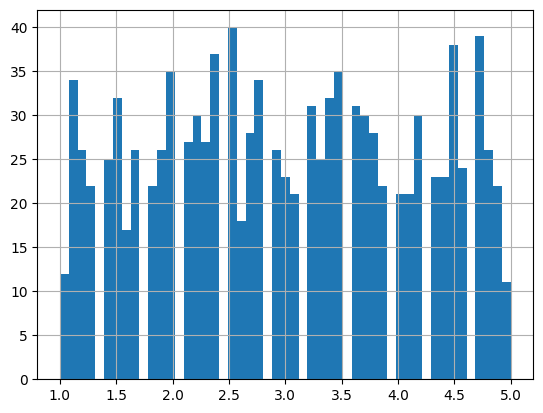

In [77]:
sample = pd.read_csv('../data/sample_submission.csv')
sample['target'].hist(bins=51)